In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
df1=pd.read_csv("accidentsVelo.csv")

C:\Users\test\AppData\Local\Temp\ipykernel_12512\2382202979.py:1: DtypeWarning: Columns (8,9,20,21,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("accidentsVelo.csv")


In [3]:
df1

,Num_Acc,date,an,mois,jour,hrmn,dep,com,lat,long,...,secuexist,equipement,obs,obsm,choc,manv,vehiculeid,typevehicules,manoeuvehicules,numVehicules
0,200500000030,2005-01-13,2005,janvier,jeudi,19:45,62,62331,50.3,2.84,...,3,0,0.0,2.0,8.0,11.0,200500000030B02,18,17,1.0
1,200500000034,2005-01-19,2005,janvier,mercredi,10:45,62,62022,0.0,0.0,...,3,0,0.0,2.0,1.0,1.0,200500000034B02,10,15,1.0
2,200500000078,2005-01-26,2005,janvier,mercredi,13:15,02,02173,0.0,0.0,...,2,2,0.0,2.0,1.0,1.0,200500000078B02,7,15,1.0
3,200500000093,2005-01-03,2005,janvier,lundi,13:30,02,02810,49.255,3.094,...,3,0,0.0,2.0,3.0,21.0,200500000093B02,7,21,1.0
4,200500000170,2005-01-29,2005,janvier,samedi,18:30,76,76196,0.0,0.0,...,1,9,0.0,2.0,4.0,2.0,200500000170A01,10,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74753,202100056317,2021-01-02,2021,janvier,samedi,18:30,44,44168,"47,3777890000","-2,1976410000",...,2,NaN,0.0,0.0,8.0,1.0,202100056317B01,7,14,1.0
74754,202100056362,2021-01-04,2021,janvier,lundi,08:20,64,64138,"43,2309460000","-0,2765840000",...,1,2,0.0,2.0,0.0,1.0,202100056362B01,7,15,1.0
74755,202100056404,2021-01-01,2021,janvier,vendredi,16:55,54,54395,"48,6849869839","6,1760189384",...,1,2,0.0,2.0,1.0,25.0,202100056404A01,7,1,1.0
74756,202100056424,2021-01-02,2021,janvier,samedi,15:40,75,75110,"48,8769050000","2,3665940000",...,2,NaN,0.0,2.0,1.0,1.0,202100056424A01,7,9,1.0


In [4]:
df1.columns

Index(['Num_Acc', 'date', 'an', 'mois', 'jour', 'hrmn', 'dep', 'com', 'lat',
       'long', 'agg', 'int', 'col', 'lum', 'atm', 'catr', 'circ', 'nbv',
       'prof', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ', 'grav',
       'sexe', 'age', 'trajet', 'secuexist', 'equipement', 'obs', 'obsm',
       'choc', 'manv', 'vehiculeid', 'typevehicules', 'manoeuvehicules',
       'numVehicules'],
      dtype='object')

In [5]:
df1=df1.drop(columns=['int','col','catr','circ','nbv','plan','lartpc','larrout','surf','infra','situ','obsm','manv','manoeuvehicules','typevehicules'])
col_names=['Numero_accident','date','an','mois','jour','heure','departement','commune','latitude','longitude','agglomération','luminosite','atmos','profil_route','gravite','sexe','age','trajet','securite_existant','equipement','obs','choc','vehiculeid','nombreVehicules']     
df1.columns=col_names

In [6]:
df1['date']=pd.to_datetime(df1['date'])

In [7]:
df1['mois']=df1['mois'].astype('category')
df1['jour']=df1['jour'].astype('category')
df1['departement']=df1['departement'].astype('category')
df1['commune']=df1['commune'].astype('category')
df1['equipement']=df1['equipement'].astype('category')

In [8]:
df1['latitude'] = df1['latitude'].astype(str)
df1['latitude'] = df1['latitude'].str.replace(',','.')
df1['latitude'] = pd.to_numeric(df1['latitude'], errors='coerce')

In [9]:
df1['longitude'] = df1['longitude'].astype(str)
df1['longitude'] = df1['longitude'].str.replace(',','.')
df1['longitude'] = pd.to_numeric(df1['longitude'], errors='coerce')

In [10]:
import numpy as np

def is_valid_time(time_str):
    try:
        pd.to_datetime(time_str, format='%H:%M')
        return True
    except ValueError:
        return False
    
df1['heure'] = df1['heure'].apply(lambda x: x if is_valid_time(x) else np.nan)
df1['heure'] = pd.to_datetime(df1['heure'], format='%H:%M', errors='coerce')

### Vérifier les valeurs manquantes

<Axes: >

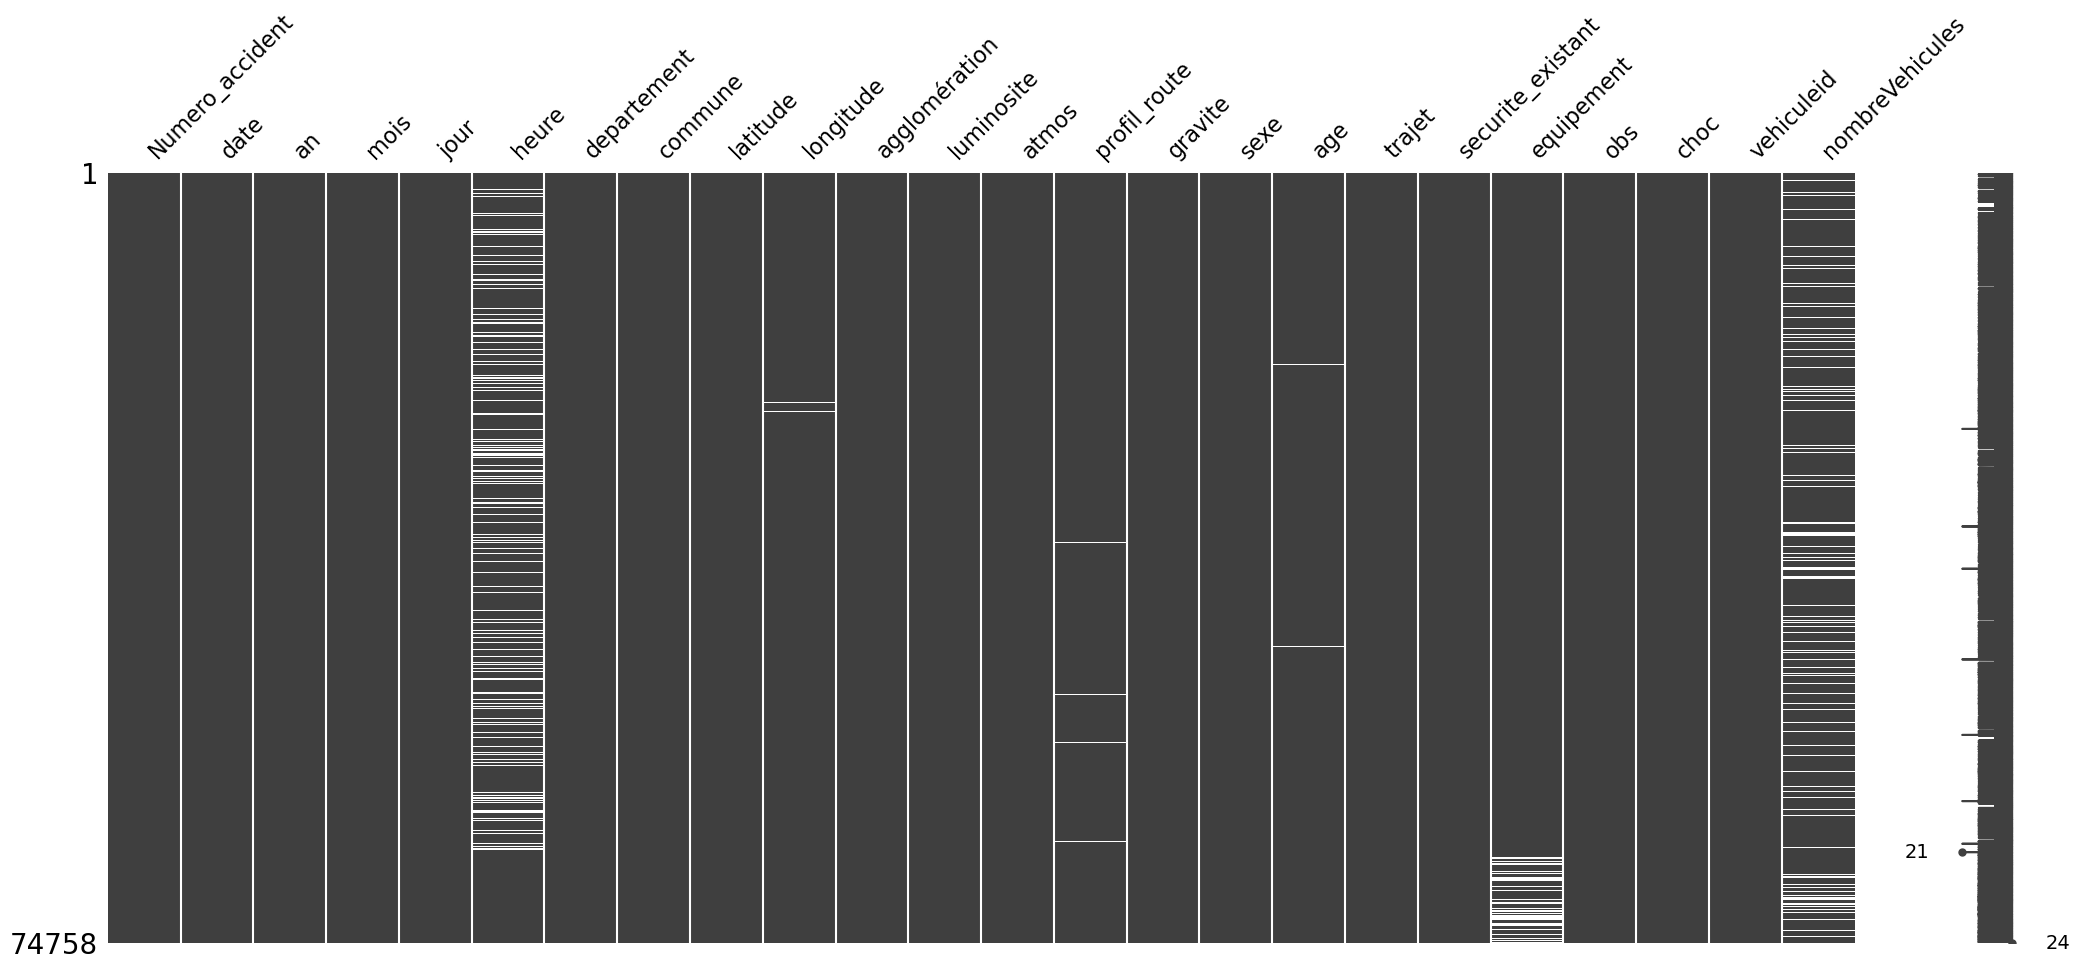

In [11]:
msno.matrix(df1)

In [12]:
df1=df1.dropna()
missing_percentage = df1.isnull().mean() * 100
missing_percentage

Numero_accident      0.0
date                 0.0
an                   0.0
mois                 0.0
jour                 0.0
heure                0.0
departement          0.0
commune              0.0
latitude             0.0
longitude            0.0
agglomération        0.0
luminosite           0.0
atmos                0.0
profil_route         0.0
gravite              0.0
sexe                 0.0
age                  0.0
trajet               0.0
securite_existant    0.0
equipement           0.0
obs                  0.0
choc                 0.0
vehiculeid           0.0
nombreVehicules      0.0
dtype: float64

In [13]:
unique_counts = df1.nunique()
unique_counts

Numero_accident      46478
date                  6057
an                      17
mois                    12
jour                     7
heure                  956
departement            113
commune               8687
latitude             16863
longitude            17721
agglomération            2
luminosite               5
atmos                    9
profil_route             5
gravite                  4
sexe                     3
age                    107
trajet                   8
securite_existant        4
equipement              37
obs                     17
choc                    11
vehiculeid           48390
nombreVehicules          5
dtype: int64

In [14]:
dictionnaires_valeurs={
    'agglomération':{
        0:'Hors agglomération',
        1:'En agglomération'
    },
    'luminosite': {
        1: "Plein jour",
        2: "Crépuscule ou aube",
        3: "Nuit sans éclairage public",
        4: "Nuit avec éclairage public non allumé",
        5: "Nuit avec éclairage public allumé"
    },
    'atmos': {
        1: "Normale",
        2: "Pluie légère",
        3: "Pluie forte",
        4: "Neige - grêle",
        5: "Brouillard - fumée",
        6: "Vent fort - tempête",
        7: "Temps éblouissant",
        8: "Temps couvert",
        9: "Autre"
    },
    'profil_route': {
        1: "Plat",
        2: "Pente",
        3: "Sommet de côte",
        4: "Bas de côte",
        5: "Virage"
    },
    'gravite': {
        1: "Indemne",
        2: "Blessé léger",
        3: "Blessé hospitalisé",
        4: "Tué"
    }, 
        'sexe': {
        1: "Homme",
        2: "Femme",
        0: "Inconnu"
    },
    'trajet': {
        1: "Domicile - Travail",
        2: "Domicile - Ecole",
        3: "Courses - Achats",
        4: "Utilisation professionnelle",
        5: "Promenade - Loisirs",
        6: "Autre",
        7: "Non renseigné",
        8: "Sans objet"
    },
    'securite_existant': {
        1: "Ceinture de sécurité",
        2: "Casque",
        3: "Non utilisé",
        4: "Inconnu"
    },
    'choc': {
        1: "Avant",
        2: "Arrière",
        3: "Côté",
        4: "Multiple",
        5: "Autre"
     },       
}

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48928 entries, 0 to 74755
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Numero_accident    48928 non-null  int64         
 1   date               48928 non-null  datetime64[ns]
 2   an                 48928 non-null  int64         
 3   mois               48928 non-null  category      
 4   jour               48928 non-null  category      
 5   heure              48928 non-null  datetime64[ns]
 6   departement        48928 non-null  category      
 7   commune            48928 non-null  category      
 8   latitude           48928 non-null  float64       
 9   longitude          48928 non-null  float64       
 10  agglomération      48928 non-null  int64         
 11  luminosite         48928 non-null  int64         
 12  atmos              48928 non-null  float64       
 13  profil_route       48928 non-null  float64       
 14  gravite    

In [16]:
df1.to_pickle('AccidentsVelo2.pkl')

In [17]:
df1.to_csv('AccidentsVelo3.csv', index=False)

In [18]:
df1.columns

Index(['Numero_accident', 'date', 'an', 'mois', 'jour', 'heure', 'departement',
       'commune', 'latitude', 'longitude', 'agglomération', 'luminosite',
       'atmos', 'profil_route', 'gravite', 'sexe', 'age', 'trajet',
       'securite_existant', 'equipement', 'obs', 'choc', 'vehiculeid',
       'nombreVehicules'],
      dtype='object')